In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import sklearn as sk
import random , calendar , datetime
from sklearn.model_selection import train_test_split



lambd = 1.5
    


In [2]:
def convertToDateTime(seconds:int): 
    seconds = seconds % (24 * 3600) 
    hour = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    return datetime.time(hour=hour , second=seconds , minute=minutes)

In [3]:
def convertToSeconds(time: datetime.time):
    hours = time.hour * 60 * 60
    minutes = time.minute * 60
    seconds = time.second
    return (hours+ minutes + seconds)


In [4]:
def get_random_dataset(amt:int):
    times = []
    clicked = []
    weekend = [0 , 6]
    days = []
    min_time = convertToSeconds(datetime.time(0))
    max_time = convertToSeconds(datetime.time(23))
    school_start = datetime.time(8)
    school_end = datetime.time(15)
    amt_record = 0
    while(amt_record < amt):
        day = random.randint(0 ,6)
        days.append(day)
        if(day in weekend):
            random_time = random.randint(min_time , max_time)
            times.append(convertToDateTime(random_time))
            if((random_time > convertToSeconds(datetime.time(9))) and (random_time < convertToSeconds(datetime.time(11)))):
                user_click = int(random.expovariate(lambd))
                if(user_click >= 0 and user_click <= 2):
                    clicked.append(True)
                else:
                    clicked.append(False)
            else:
                user_click = int(random.expovariate(lambd))
                if(user_click >= 0 and user_click <= 2):
                    clicked.append(False)
                else:
                    clicked.append(True)
        else:
            random_time = random.randint(min_time , max_time)
            times.append(convertToDateTime(random_time))
            if((random_time > convertToSeconds(datetime.time(8))) and (random_time < convertToSeconds(datetime.time(11)))):
                user_click = int(random.expovariate(lambd))
                if(user_click >= 0 and user_click <= 2):
                    clicked.append(True)
                else:
                    clicked.append(False)   
            else:
                user_click = int(random.expovariate(lambd))
                if(user_click >= 0 and user_click <= 2):
                    clicked.append(False)
                else:
                    clicked.append(True)   
        amt_record += 1

    return (days , times , clicked)    
        

In [5]:
dataset = get_random_dataset(10000)
dataset_dict = {'Days': dataset[0] , 'Time' : dataset[1] , 'Clicked': dataset[2]}
dataframe = pd.DataFrame(dataset_dict)
dataframe_train , dataframe_test = train_test_split(dataframe , test_size = 0.2)
dataframe = dataframe_train
#dataframe.to_pickle("./data/dataset.pkl")
dataframe.head


<bound method NDFrame.head of       Days      Time  Clicked
6164     3  13:25:38    False
2663     0  02:34:02    False
825      0  06:03:49    False
5840     4  15:12:25    False
5739     0  10:19:48     True
...    ...       ...      ...
4208     2  09:07:44     True
2500     0  03:25:30    False
2915     4  22:49:04    False
4463     6  00:20:13    False
6029     4  15:28:13    False

[8000 rows x 3 columns]>

In [6]:
dataframe['Clicked'] = pd.Categorical(dataframe['Clicked'])
dataframe['Clicked'] = dataframe.Clicked.cat.codes
dataframe.dtypes


Days        int64
Time       object
Clicked      int8
dtype: object

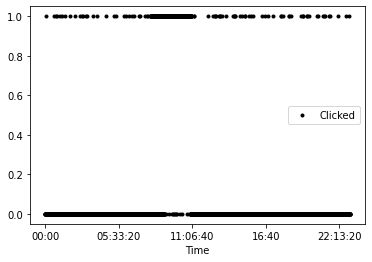

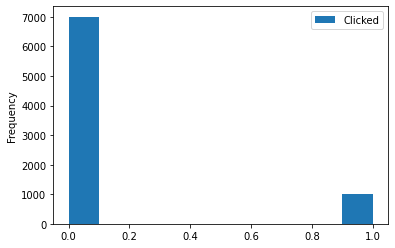

In [7]:
dataframe.plot(x="Time" , y="Clicked" , style="k.")
dataframe.plot(x='Time' , y=['Clicked'] , kind='hist')

In [8]:
dataframe.Time = dataframe.Time.apply(lambda x: convertToSeconds(x))
dataframe.dtypes


Days       int64
Time       int64
Clicked     int8
dtype: object

In [9]:
time_col = dataframe.Time
timeFrame = time_col.copy()
time_np= pd.DataFrame.to_numpy(timeFrame)
time_np[:10]

array([48338,  9242, 21829, 54745, 37188, 35293, 65864,  8394, 18978,
       45285])

In [10]:
buckets = [0 , 10800 , 21600, 32400, 43200 , 54000, 64800  ,75600 , 86400 ]
labels = ['first_eighth' , 'second_eighth' , 'third_eighth' , 'fourth_eighth' , 'fifth_eighth' , 'sixt_eighth' , 'seventh_eighth' , 'eighth_eighth']
labeled_time = pd.cut(time_np, right=True , bins=buckets , labels=labels)
labeled_time[:10]

[fifth_eighth, first_eighth, third_eighth, sixt_eighth, fourth_eighth, fourth_eighth, seventh_eighth, first_eighth, second_eighth, fifth_eighth]
Categories (8, object): [first_eighth < second_eighth < third_eighth < fourth_eighth < fifth_eighth < sixt_eighth < seventh_eighth < eighth_eighth]

In [11]:
timeFrame = dataframe.pop('Time')
dataframe['Time'] = labeled_time

In [12]:
one_hot_times = pd.get_dummies(dataframe.Time , prefix='')

In [13]:
for columns , series  in one_hot_times.items():
    dataframe[columns] = series
#adds to the column

In [14]:
#dataframe.head
dataframe.pop('Time')
dataframe.dtypes

Days               int64
Clicked             int8
_first_eighth      uint8
_second_eighth     uint8
_third_eighth      uint8
_fourth_eighth     uint8
_fifth_eighth      uint8
_sixt_eighth       uint8
_seventh_eighth    uint8
_eighth_eighth     uint8
dtype: object

In [15]:
one_hot_days = pd.get_dummies(dataframe.Days , prefix='day')

In [16]:
one_hot_days.head

<bound method NDFrame.head of       day_0  day_1  day_2  day_3  day_4  day_5  day_6
6164      0      0      0      1      0      0      0
2663      1      0      0      0      0      0      0
825       1      0      0      0      0      0      0
5840      0      0      0      0      1      0      0
5739      1      0      0      0      0      0      0
...     ...    ...    ...    ...    ...    ...    ...
4208      0      0      1      0      0      0      0
2500      1      0      0      0      0      0      0
2915      0      0      0      0      1      0      0
4463      0      0      0      0      0      0      1
6029      0      0      0      0      1      0      0

[8000 rows x 7 columns]>

In [17]:
for columns , series in one_hot_days.items():
    dataframe[columns] = series

dataframe.pop('Days')
dataframe.head

<bound method NDFrame.head of       Clicked  _first_eighth  _second_eighth  _third_eighth  _fourth_eighth  \
6164        0              0               0              0               0   
2663        0              1               0              0               0   
825         0              0               0              1               0   
5840        0              0               0              0               0   
5739        1              0               0              0               1   
...       ...            ...             ...            ...             ...   
4208        1              0               0              0               1   
2500        0              0               1              0               0   
2915        0              0               0              0               0   
4463        0              1               0              0               0   
6029        0              0               0              0               0   

      _fifth_eighth  

In [18]:
target = dataframe.pop('Clicked')
dataset = tf.data.Dataset.from_tensor_slices((dataframe.values , target))


In [19]:
for feat , targ in dataset.take(5):
      print ('Features: {}, Target: {}'.format(feat, targ))
      print(len(feat))


Features: [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0], Target: 0
15
Features: [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0], Target: 0
15
Features: [0 0 1 0 0 0 0 0 1 0 0 0 0 0 0], Target: 0
15
Features: [0 0 0 0 0 1 0 0 0 0 0 0 1 0 0], Target: 0
15
Features: [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0], Target: 1
15


In [20]:
def get_compiled_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(10 , activation='relu'),
        tf.keras.layers.Dense( 5, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam',
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                metrics=['accuracy'])
    return model
    

In [21]:
class CheckEpochAccuracy(keras.callbacks.Callback):
    def on_epoch_end(self , epoch , log=None):
         print("...Predicting: start of epoch{0}; got accuracy: {1}".format(epoch, log["accuracy"]))


In [22]:
train_dataset = dataset.shuffle(len(dataframe)).batch(1)
train_dataset.element_spec

(TensorSpec(shape=(None, 15), dtype=tf.uint8, name=None),
 TensorSpec(shape=(None,), dtype=tf.int8, name=None))

In [23]:
model = get_compiled_model()
model.fit(train_dataset , epochs=20 , callbacks=[CheckEpochAccuracy()])

Epoch 1/20
8000/8000 [==============================] - 6s 735us/step - loss: 0.2254 - accuracy: 0.8758
Epoch 2/20
8000/8000 [==============================] - 6s 730us/step - loss: 0.2016 - accuracy: 0.8758
Epoch 3/20
8000/8000 [==============================] - 6s 726us/step - loss: 0.2009 - accuracy: 0.8792
Epoch 4/20
8000/8000 [==============================] - 6s 712us/step - loss: 0.2001 - accuracy: 0.9038
Epoch 5/20
8000/8000 [==============================] - 6s 711us/step - loss: 0.2001 - accuracy: 0.8934
Epoch 6/20
8000/8000 [==============================] - 6s 718us/step - loss: 0.1998 - accuracy: 0.9032
Epoch 7/20
8000/8000 [==============================] - 6s 714us/step - loss: 0.1992 - accuracy: 0.9055
Epoch 8/20
8000/8000 [==============================] - 6s 721us/step - loss: 0.1989 - accuracy: 0.9081
Epoch 9/20
8000/8000 [==============================] - 6s 716us/step - loss: 0.1990 - accuracy: 0.9075
Epoch 10/20
8000/8000 [==============================] - 5s 653u